### Note:
- This notebook only process three types of experiment data which are:
1. EMG measurement from three channels
2. Elbow flexion / extension

In [3]:
import os
import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

import scipy
from scipy import signal
from scipy.signal import freqz

import math

### Prepare the functions of filter

In [147]:
def full_wave_rectify(signal):
    rectify_emg = np.absolute(signal)
    return rectify_emg
    
def band_pass(signal, fs = 2000, high_band = 450, low_band = 20, order = 4):
    """
    signal: rectified EMG data
    high_band: high pass filter cut off frequency
    low_band: low pass filter cut off frequency
    fs: sampling frequency
    order: order of filter
    """
    # normalize cut-off frequency by sampling frequency
#     high_band = high_band / (fs)
#     low_band = low_band / (fs)
    # create bandpass filter gain
    b, a = scipy.signal.butter(order, [low_band, high_band], btype='bandpass', analog = False)
    
    # Filter EMG 
    emg_bandpass = scipy.signal.filtfilt(b, a, signal, padlen = 1)
    return emg_bandpass

def low_pass(signal, fs = 2000, low_pass = 10, order = 4):
    """
    signal: rectified EMG data
    low_pass: low pass filter cut off frequency
    fs: sampling frequency
    order: rder of filter
    """
    
    # normalize cut-off frequency
    low_pass = low_pass / (fs / 2)
    #create lowpass filter
    b, a = scipy.signal.butter(order, low_pass, btype = 'lowpass', analog = True)
    emg_envelop = scipy.signal.filtfilt(b, a, signal, padlen = 1, axis = 1)
    return emg_envelop

def high_pass(signal, fs = 2000, high_pass = 10, order = 4):
    """
    signal: rectified EMG data
    high_pass: high pass filter cut off frequency
    fs: sampling frequency
    order: order of filter
    """
    
    high_pass = high_pass / (fs / 2)
    b, a = scipy.signal.butter(order, high_pass, btype = 'highpass')
    emg_envelop = scipy.signal.filtfilt(b, a, signal, padlen = 1)
    return emg_envelop
    

### Data Preprocessing
1. Full-wave rectification
2. Remove the noise from data by using Butterworth Filter
3. Feature extraction
4. Dimensionality Reduction (*Optional)
5. Save the data as '.csv' file

In [148]:
path = r'/home/jerry/GitHub/EMG_regressive_model/data_process/raw_data'
all_files = glob.glob(path+'/*.csv')
dfList = []

In [149]:
# Setup the parameters of signal
fs = 2000


In [150]:
# Read .csv file by using panda

# for filename in all_files:
file = all_files[0]
saveName = file[-11:-4]
print(file)
allData = pd.read_csv(file, skiprows = 4, header = None)

# Create the dataframe for EMG data and Joint angle
emgData = allData.iloc[:, 3:6]
angleData = allData.iloc[:, 32:33]

#Convert the dataframe to numpy array
emg = emgData.to_numpy()
time = np.array([i/2000 for i in range(0, len(emg), 1)]) # sampling rate 2000 Hz
mean = np.mean(emg, axis = 0)
emgAvg = emg - mean

angle = angleData.to_numpy()
# Perform the full wave rectification
rectEmg = full_wave_rectify(emgAvg)
print(len(rectEmg))
highEmg = high_pass(rectEmg, order = 8, high_pass = 15, fs = 2000)
lowEmg = low_pass(highEmg, order = 4, low_pass = 1000, fs = 2000)

# 

/home/jerry/GitHub/EMG_regressive_model/data_process/raw_data/2021-06-08-13-30_CUBE elbow data collection_4.4_T_3.csv
51840


/home/jerry/anaconda3/envs/torch/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


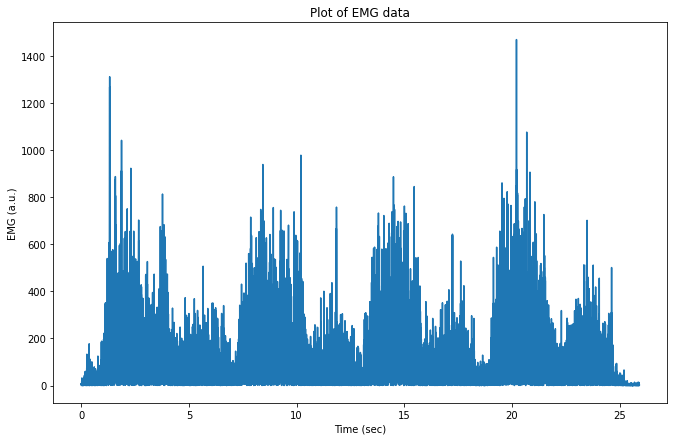

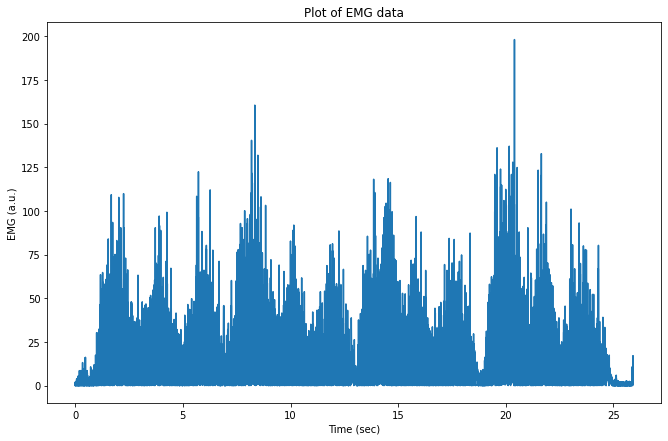

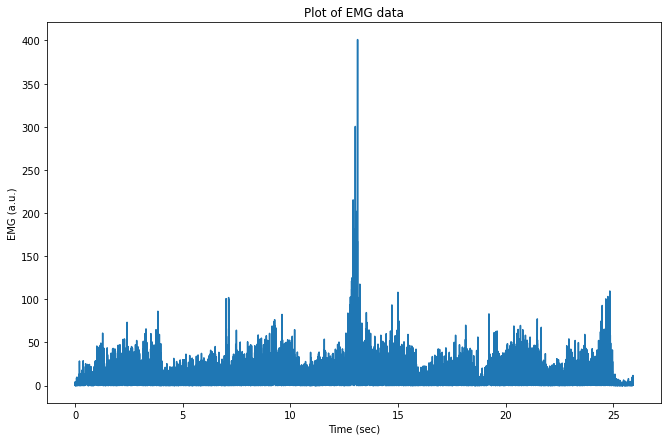

In [151]:
for i in range(3):
    fig = plt.figure()
    plt.plot(time, rectEmg[:, i])
    plt.xlabel('Time (sec)')
    plt.ylabel('EMG (a.u.)')
    plt.title('Plot of EMG data')
    fig_name = 'filtEmg2.png'
    fig.set_size_inches(w=11,h=7)
    fig.savefig(fig_name)

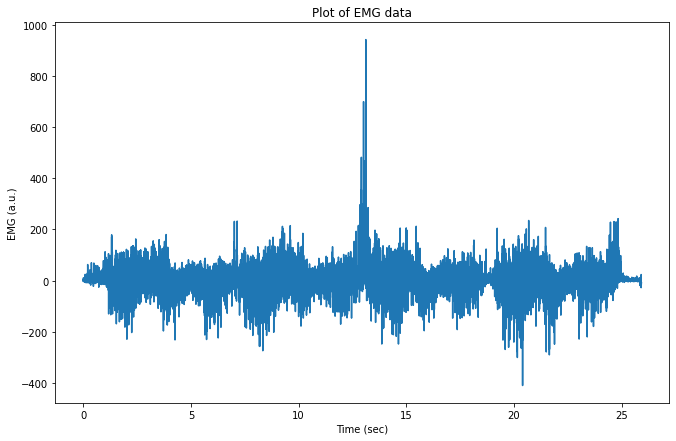

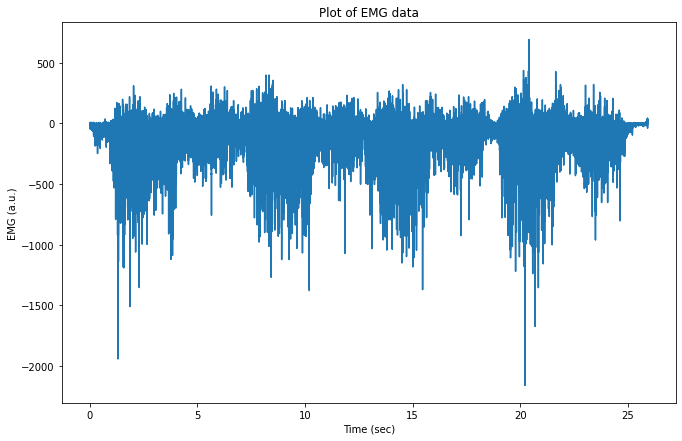

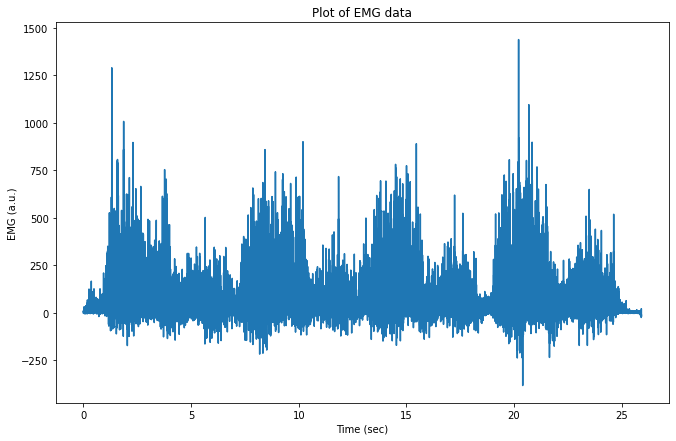

In [152]:
for i in range(3):
    fig = plt.figure()
    plt.plot(time, lowEmg[:, i])
    plt.xlabel('Time (sec)')
    plt.ylabel('EMG (a.u.)')
    plt.title('Plot of EMG data')
    fig_name = 'filtEmg2.png'
    fig.set_size_inches(w=11,h=7)
    fig.savefig(fig_name)

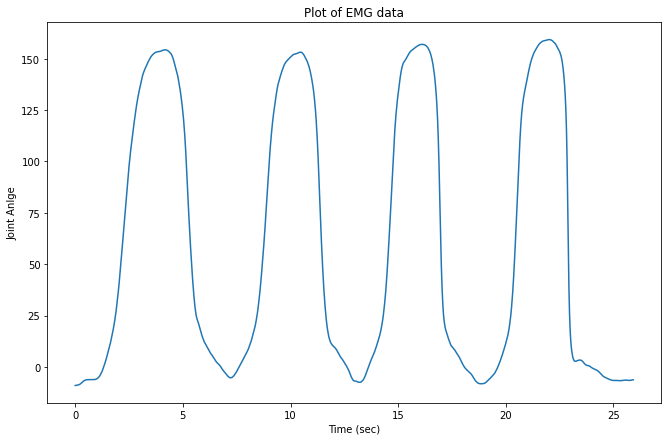

In [90]:
fig = plt.figure()
plt.plot(time, angle)
plt.xlabel('Time (sec)')
plt.ylabel('Joint Anlge')
plt.title('Plot of EMG data')
fig_name = 'fig2.png'
fig.set_size_inches(w=11,h=7)
fig.savefig(fig_name)